<a href="https://colab.research.google.com/github/kabaiban/test/blob/master/1022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
install.packages("ggplot2")
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



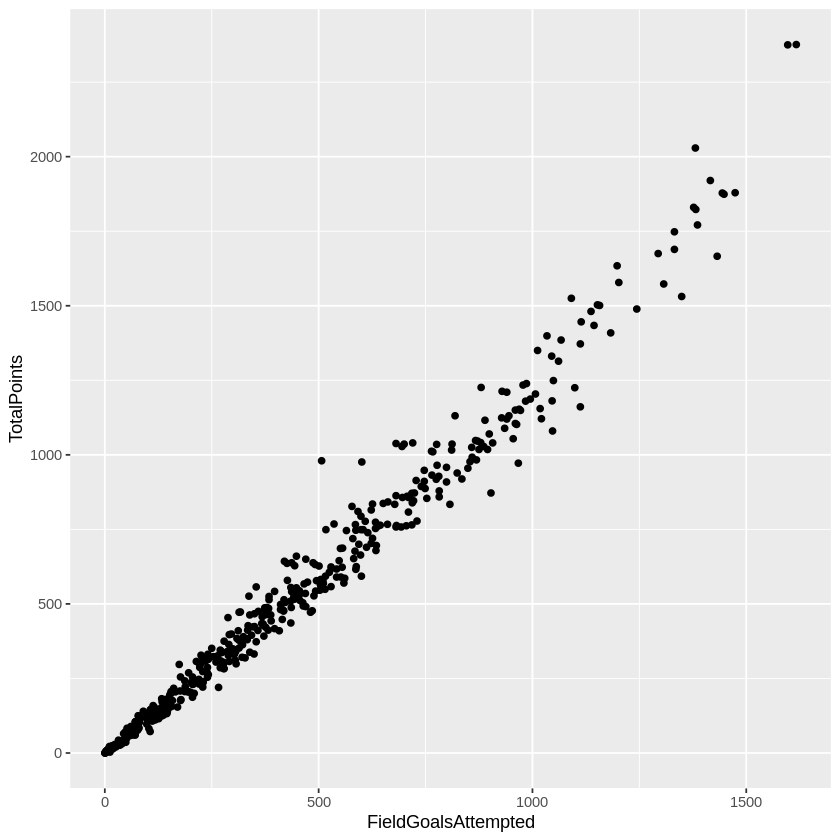

In [7]:
library(SportsAnalytics)
library(ggplot2)

NBA1516<-fetch_NBAPlayerStatistics("15-16")
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516)

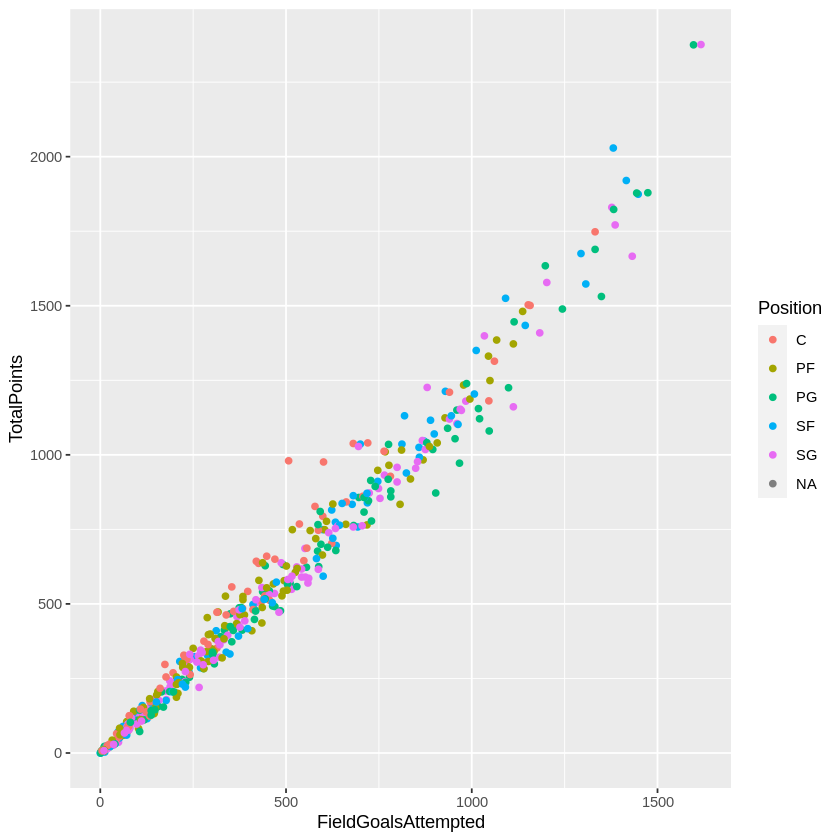

In [10]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,color=Position)

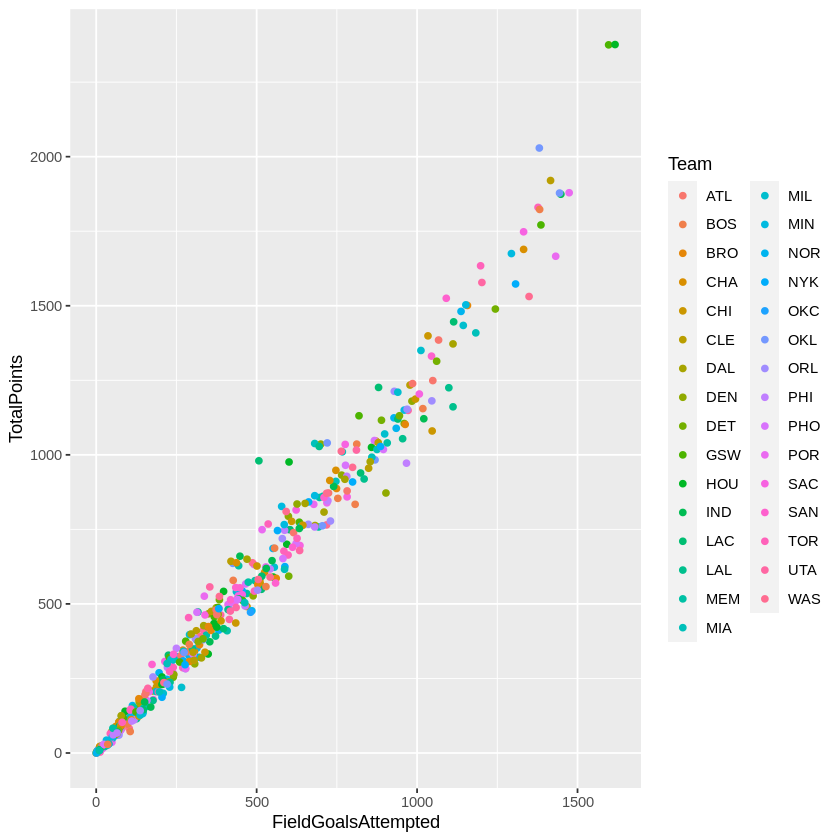

In [11]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,color=Team)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



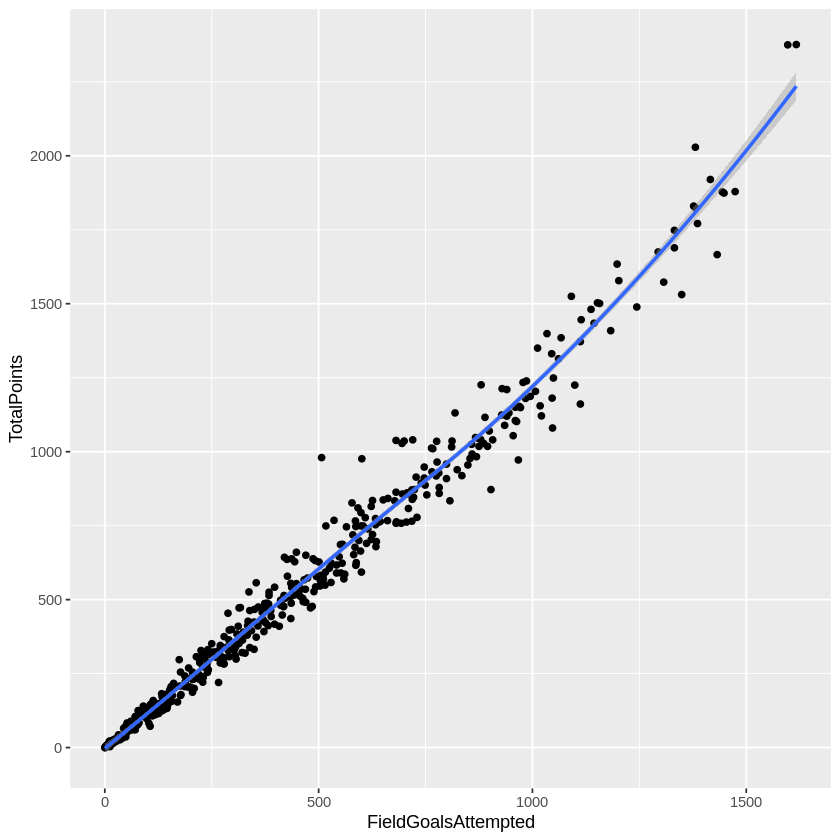

In [13]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,geom = c("point","smooth"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



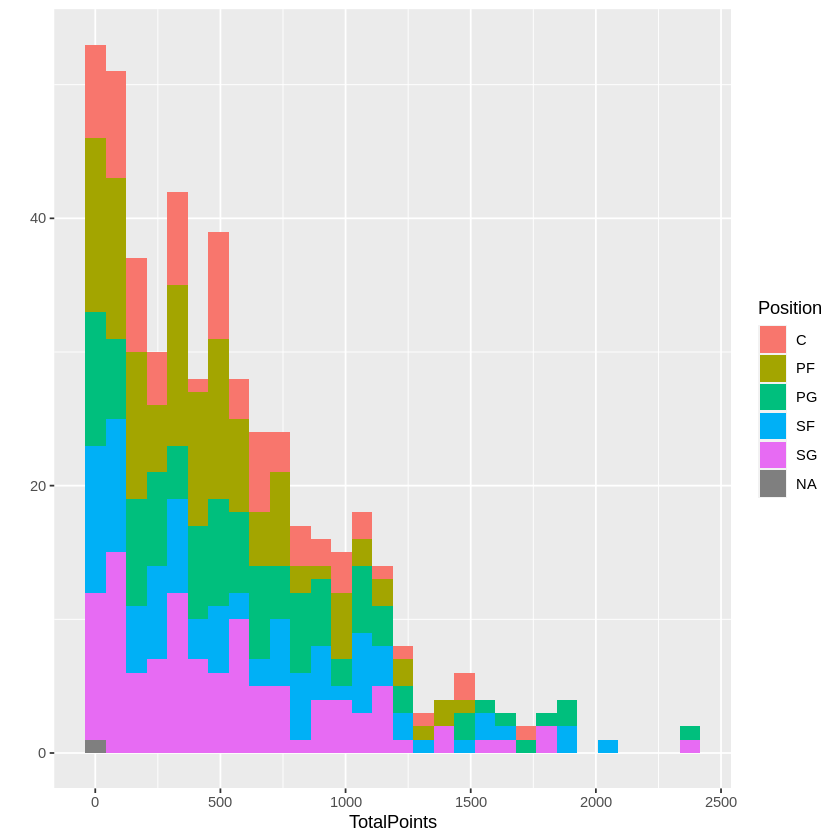

In [15]:
qplot(TotalPoints,data=NBA1516,fill=Position)

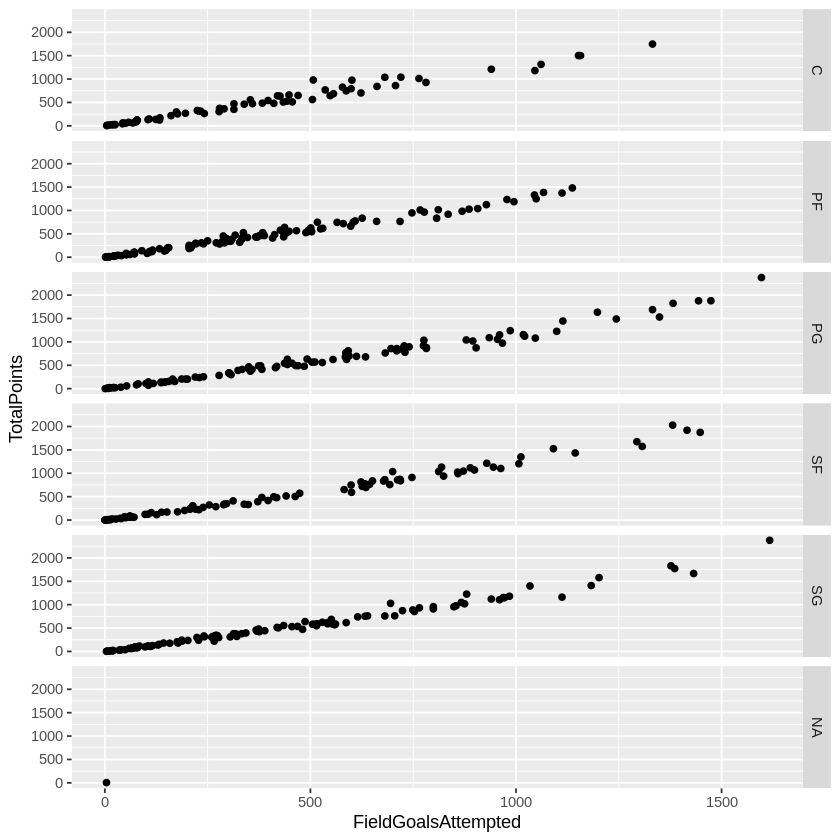

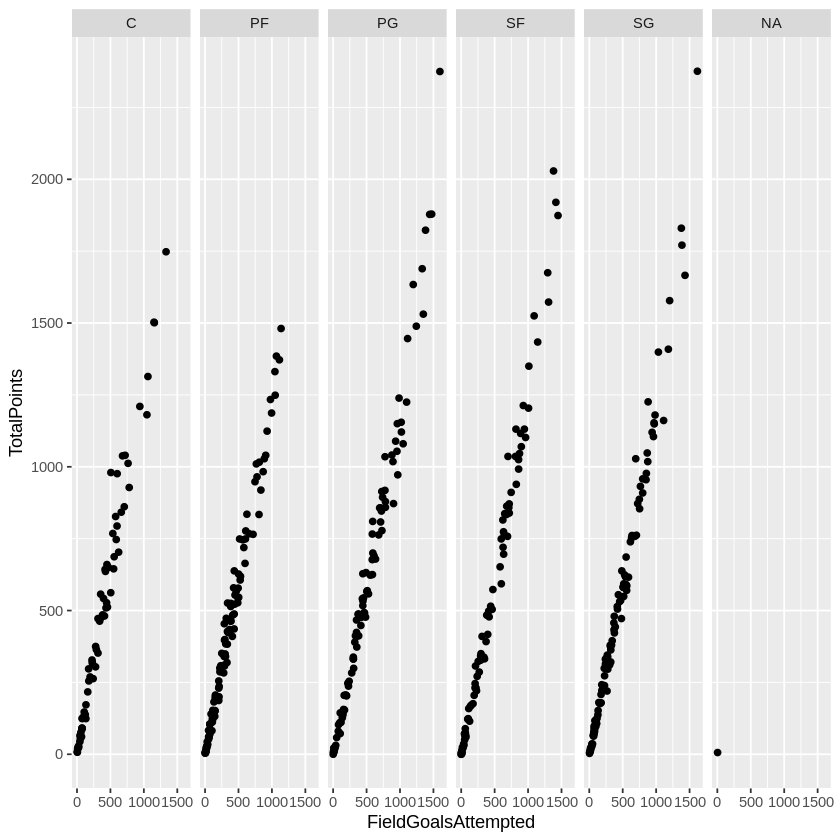

In [16]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,facets=Position~.)

qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,facets=.~Position)

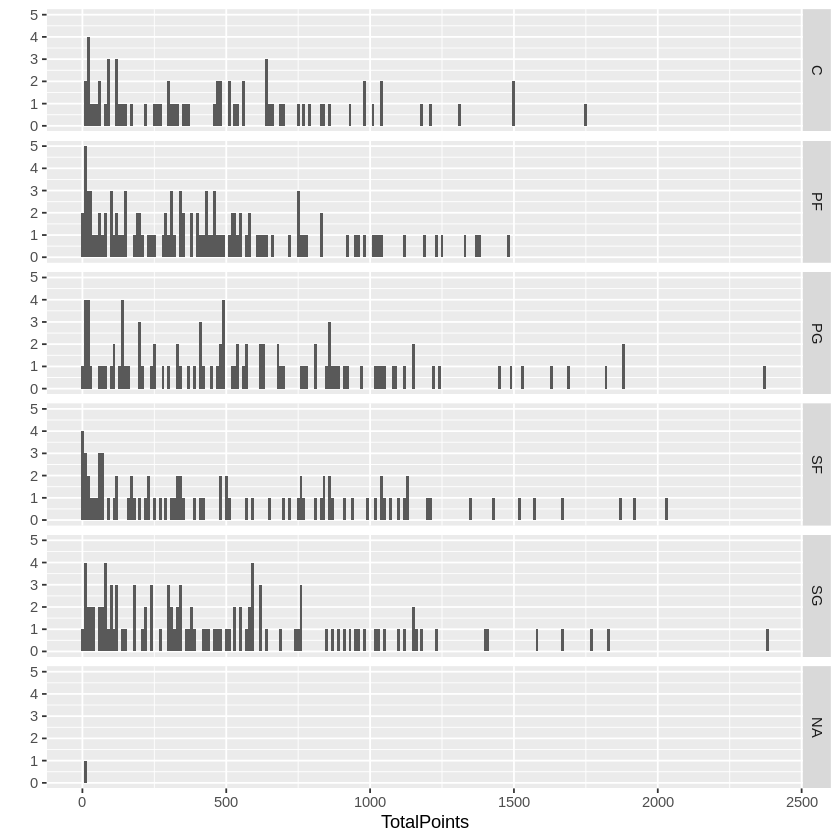

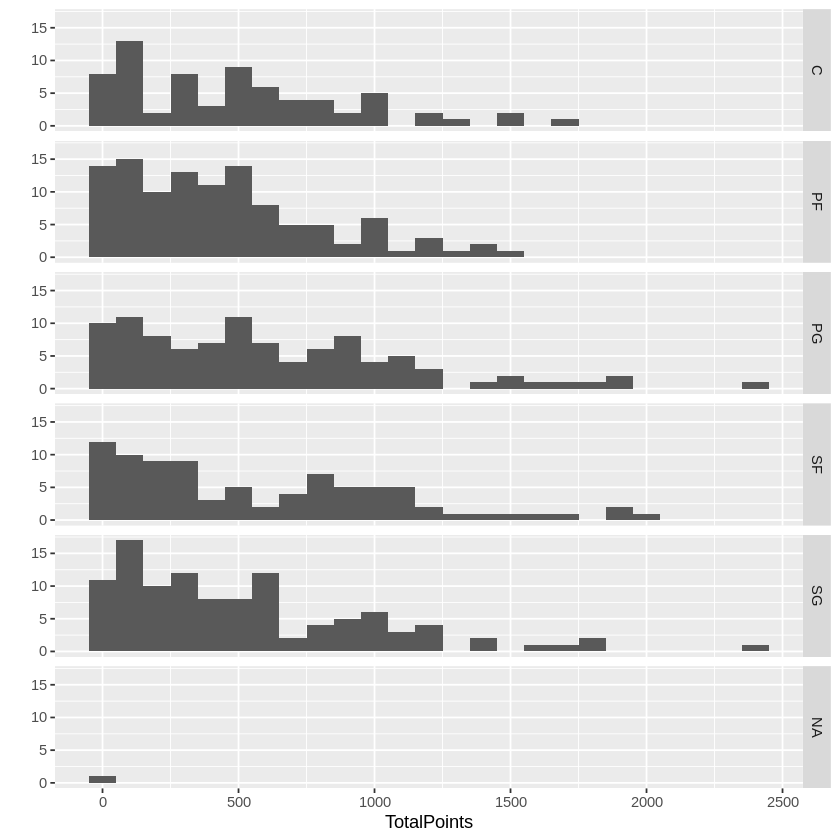

In [18]:
qplot(TotalPoints,data=NBA1516,facets=Position~.,binwidth=10)

qplot(TotalPoints,data=NBA1516,facets=Position~.,binwidth=100)

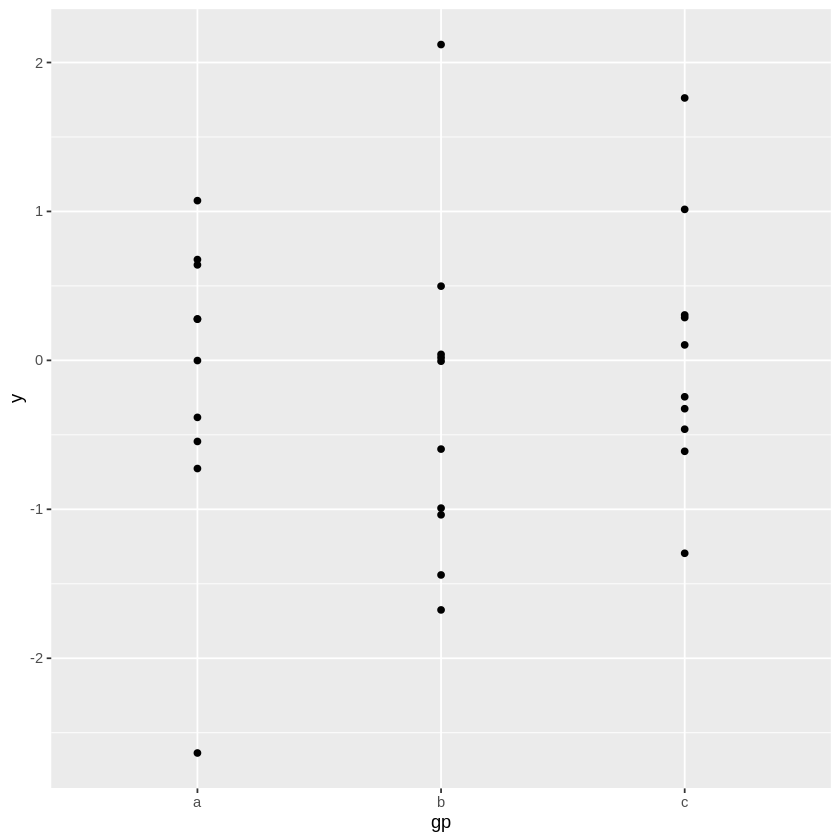

In [26]:
df<-data.frame(gp=factor(rep(letters[1:3],each=10)),y=rnorm(30))

ggplot(df,aes(x=gp,y=y))+geom_point()

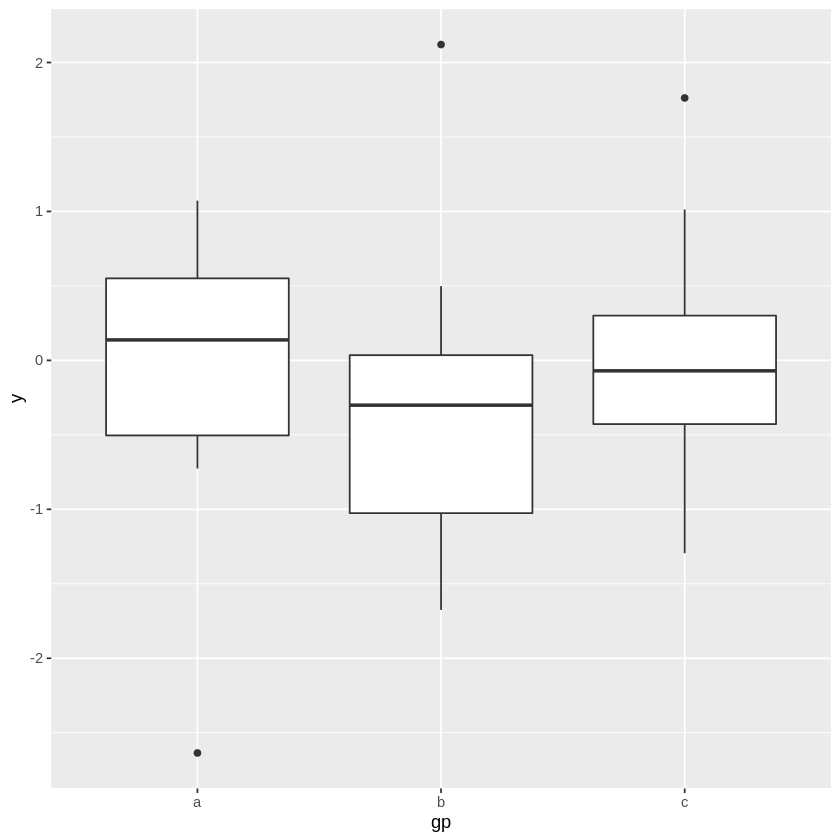

In [27]:
ggplot(df,aes(x=gp,y=y))+geom_boxplot()

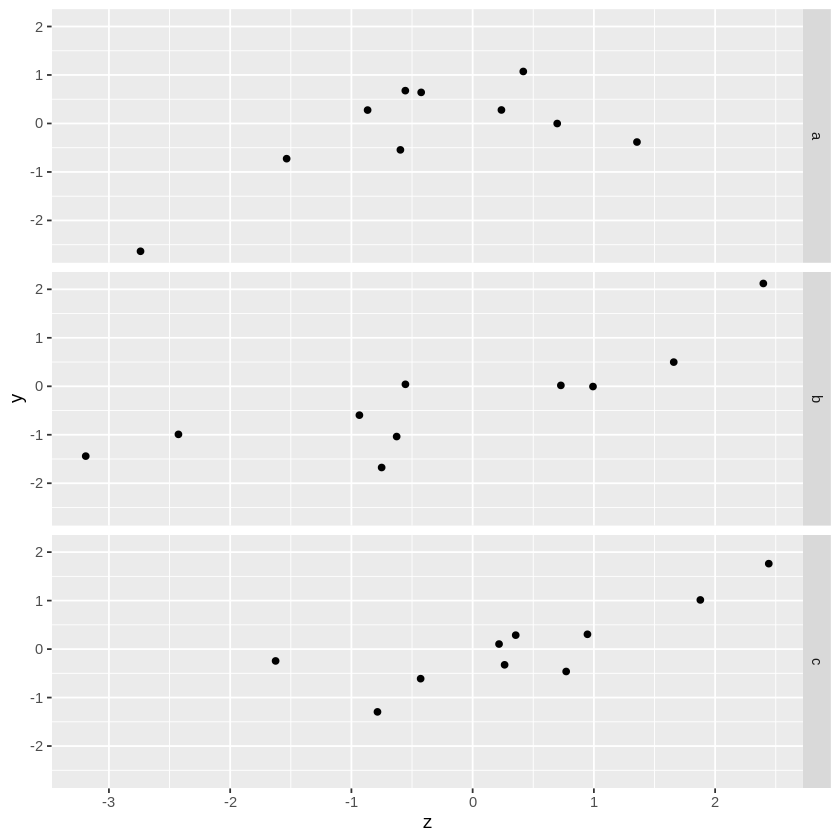

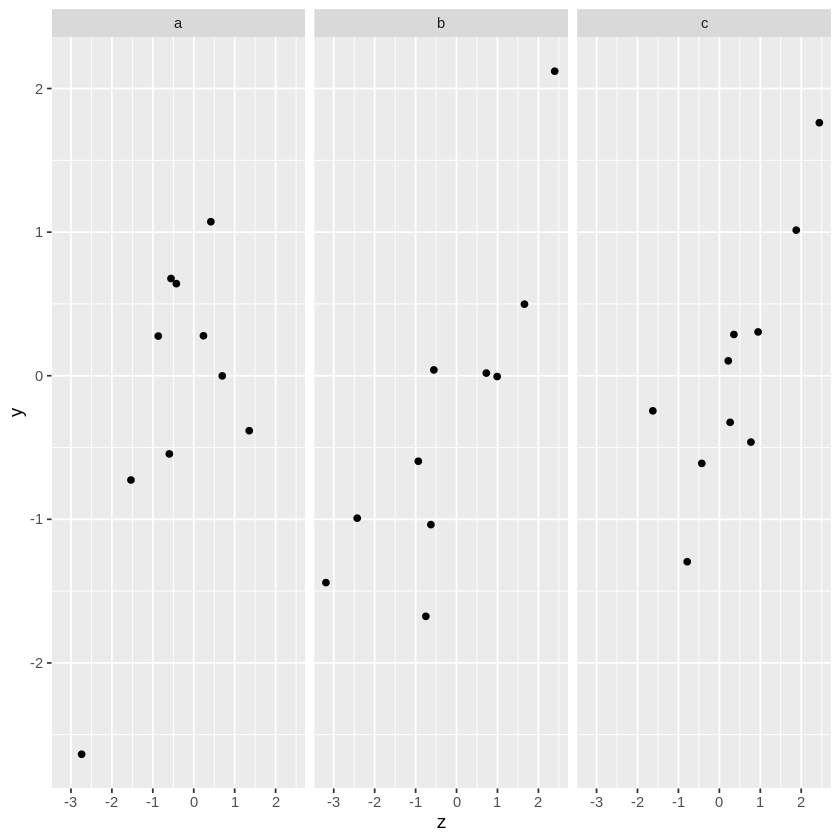

In [29]:
df$z<-df$y+rnorm(30)

ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(gp~.)

ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(.~gp)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



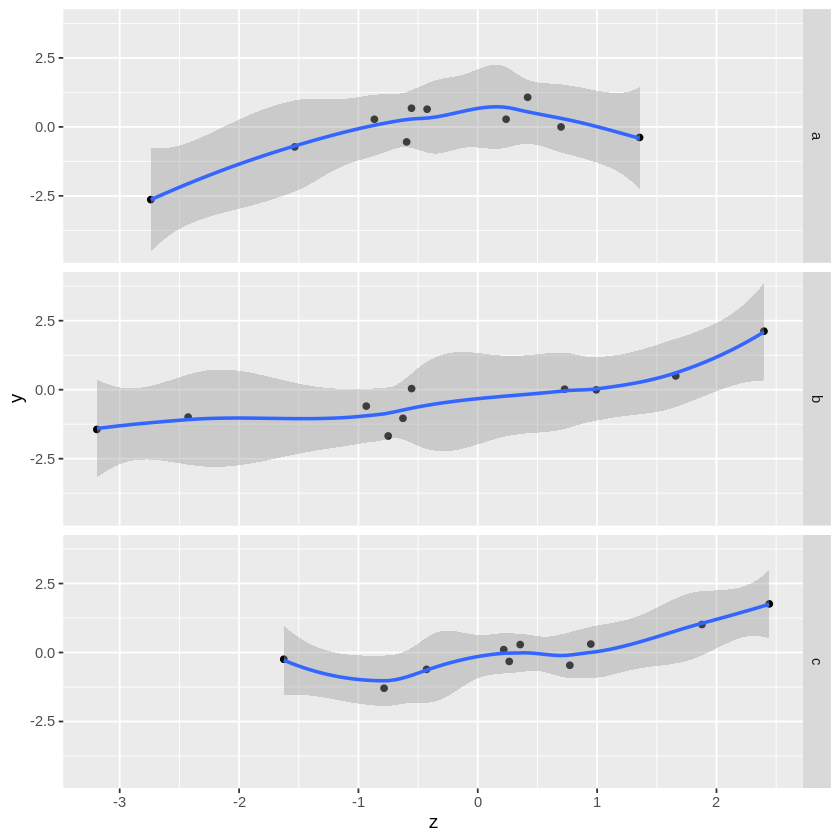

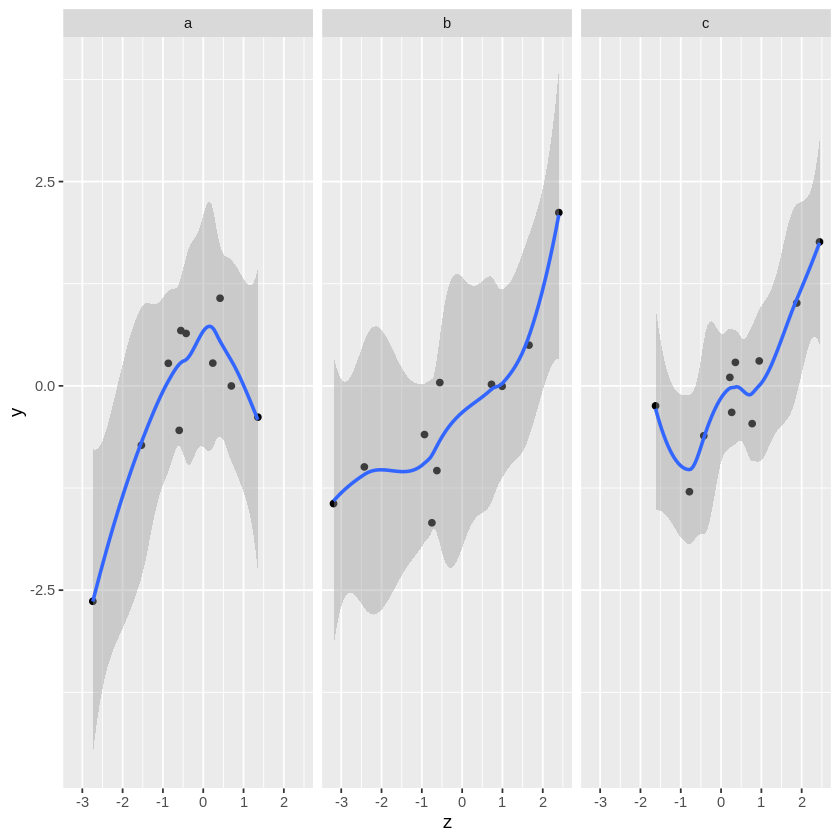

In [31]:
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(gp~.)+geom_smooth()

ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(.~gp)+geom_smooth()

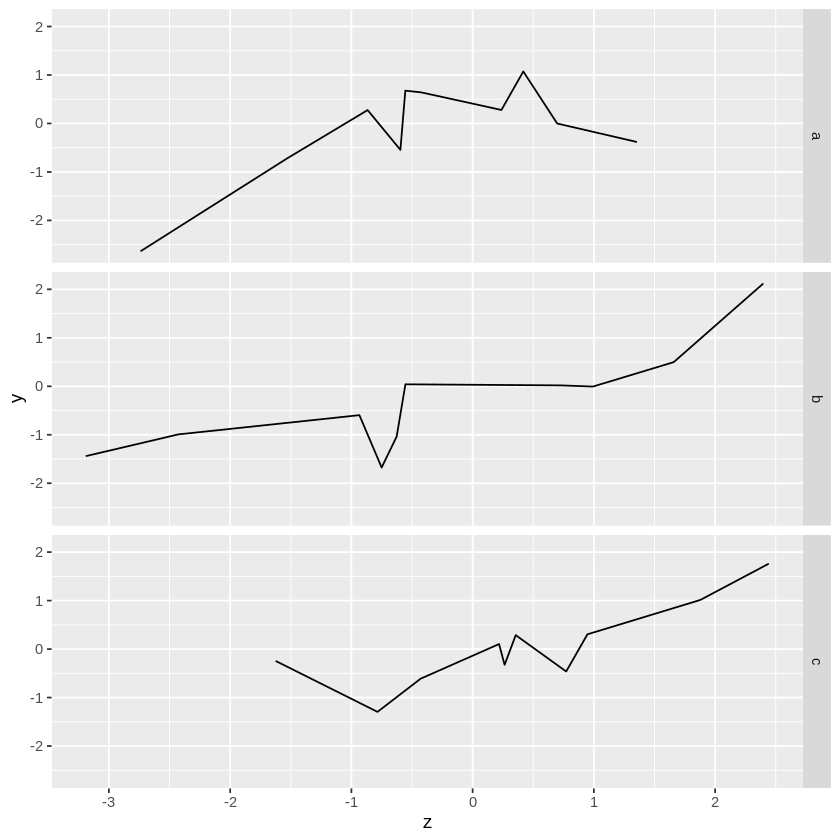

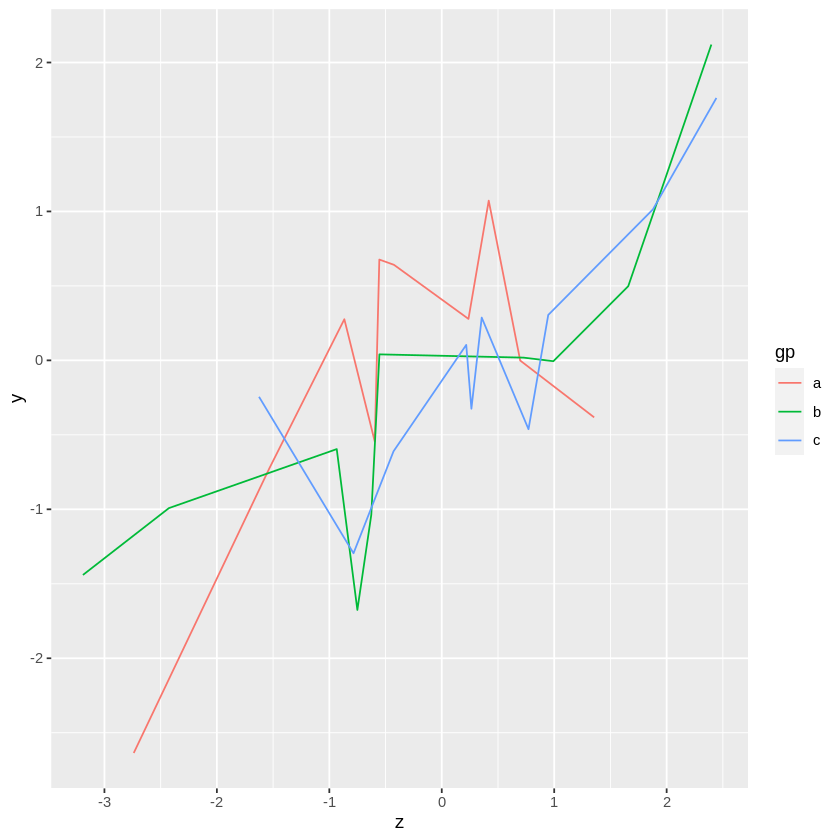

In [33]:
ggplot(df,aes(x=z,y=y))+geom_line()+facet_grid(gp~.)

ggplot(df,aes(x=z,y=y,color=gp))+geom_line()

In [34]:
install.packages("datasets")
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



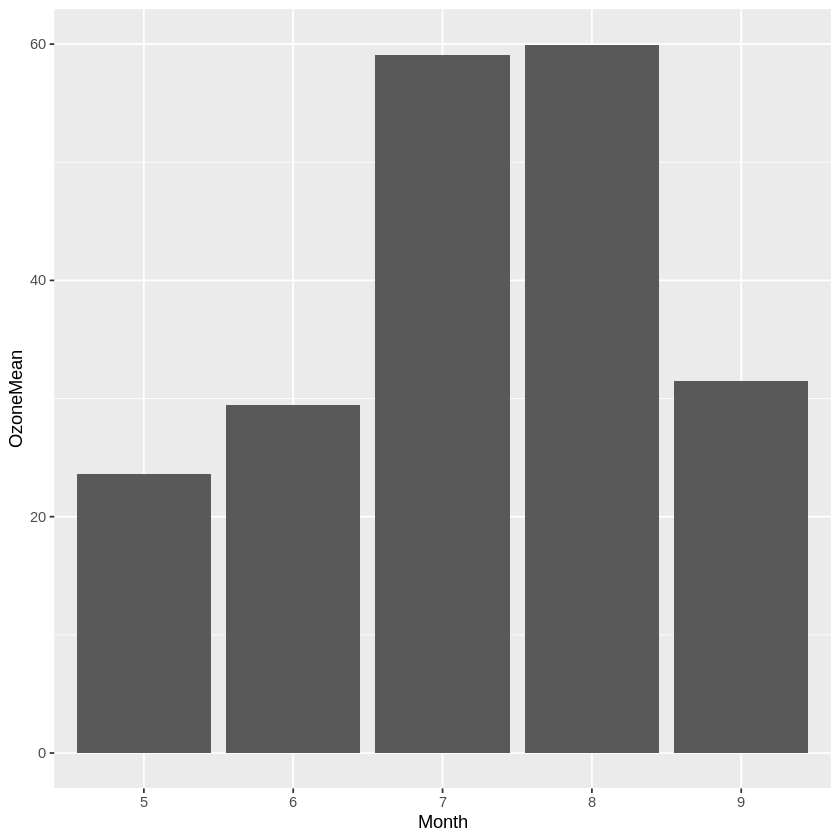

In [36]:
library(datasets)
library(data.table)
airquality$Month<-as.factor(airquality$Month)
airquality.mean<-data.table(airquality)[,.(OzoneMean=mean(Ozone,na.rm=T)),by=Month]
ggplot()+geom_bar(data=airquality.mean,aes(x=Month,y=OzoneMean),stat="identity")

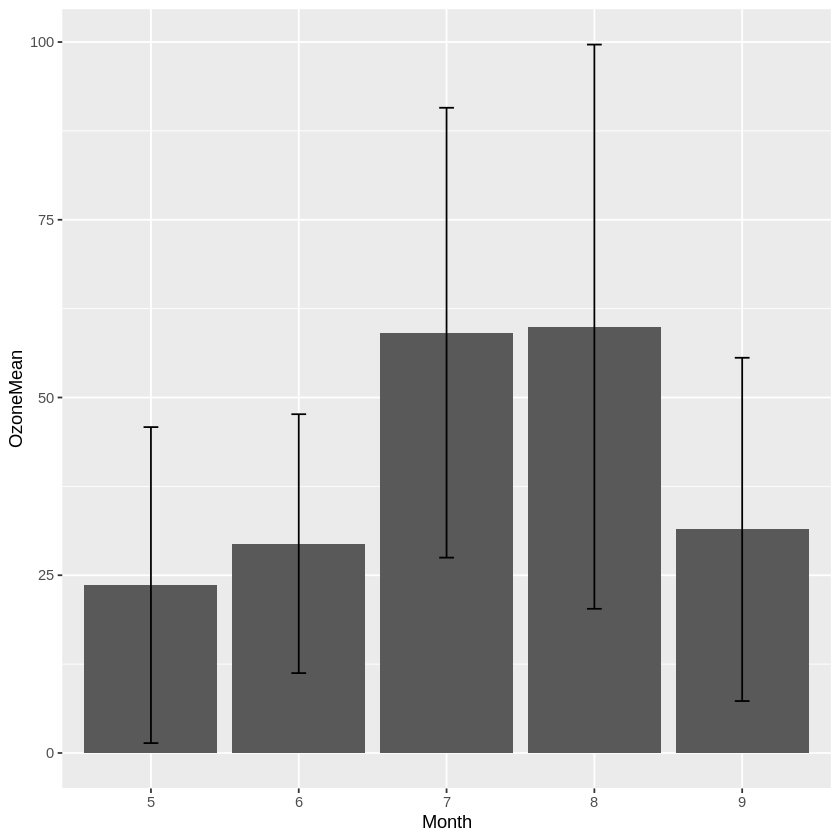

In [38]:
airquality.stat<-data.table(airquality)[,.(OzoneMean=mean(Ozone,na.rm=T),OzoneSD=sd(Ozone,na.rm=T)),by=Month]
ggplot(data=airquality.stat)+
geom_bar(aes(x=Month,y=OzoneMean),stat="identity")+
geom_errorbar(aes(x=Month,ymin=OzoneMean-OzoneSD,ymax=OzoneMean+OzoneSD),width=.1)